In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# import os
# import shutil
# import posixpath

import wfdb

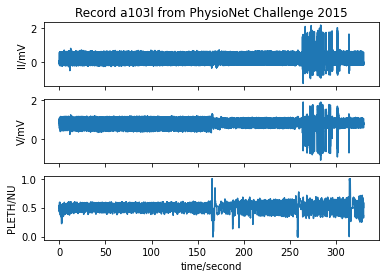

{'record_name': 'a103l',
 'n_sig': 3,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 82500,
 'base_time': None,
 'base_date': None,
 'comments': ['Asystole', 'False alarm'],
 'sig_name': ['II', 'V', 'PLETH'],
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [24, 24, 24],
 'adc_gain': [7247.0, 10520.0, 12530.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'NU'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [-171, 9127, 6042],
 'checksum': [-27403, -301, -1739

In [2]:
record = wfdb.rdrecord('../wfdb ECG Python/sample-data/a103l') 
wfdb.plot_wfdb(record=record, title='Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

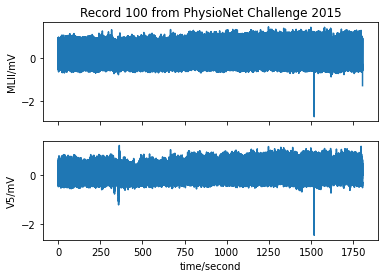

{'record_name': 'a103l',
 'n_sig': 3,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 82500,
 'base_time': None,
 'base_date': None,
 'comments': ['Asystole', 'False alarm'],
 'sig_name': ['II', 'V', 'PLETH'],
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [24, 24, 24],
 'adc_gain': [7247.0, 10520.0, 12530.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'NU'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [-171, 9127, 6042],
 'checksum': [-27403, -301, -1739

In [3]:
record2 = wfdb.rdrecord('../wfdb ECG Python/sample-data/100') 
wfdb.plot_wfdb(record=record2, title='Record 100 from PhysioNet Challenge 2015') 
display(record.__dict__)

In [6]:
signal, feilds = wfdb.rdsamp('../wfdb ECG Python/sample-data/a103l')
signal

array([[-0.02359597,  0.86758555,  0.48220271],
       [-0.03698082,  0.98298479,  0.5443735 ],
       [-0.06292259,  0.85979087,  0.47821229],
       ...,
       [-0.04084449,  0.7493346 ,  0.5150838 ],
       [-0.04719194,  0.7581749 ,  0.50957702],
       [-0.04677798,  0.7615019 ,  0.5028731 ]])

In [7]:
feilds

{'fs': 250,
 'sig_len': 82500,
 'n_sig': 3,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV', 'NU'],
 'sig_name': ['II', 'V', 'PLETH'],
 'comments': ['Asystole', 'False alarm']}

In [8]:
np.savetxt("signal.csv", signal, delimiter=',')

In [9]:
import pandas as pd

In [13]:
data1 = pd.DataFrame(signal, columns=feilds.get('sig_name'))
data1.head()

,II,V,PLETH
0,-0.023596,0.867586,0.482203
1,-0.036981,0.982985,0.544374
2,-0.062923,0.859791,0.478212
3,-0.092452,0.788783,0.442857
4,-0.094522,0.851996,0.474302


<AxesSubplot:>

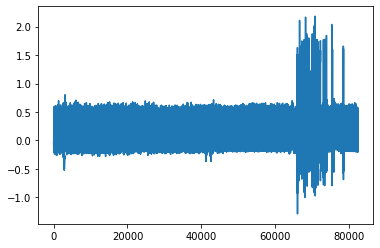

In [17]:
data1['II'].plot()

In [15]:
[
    method_name
    for method_name in dir(data1.plot)
    if not method_name.startswith("_")
]


['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

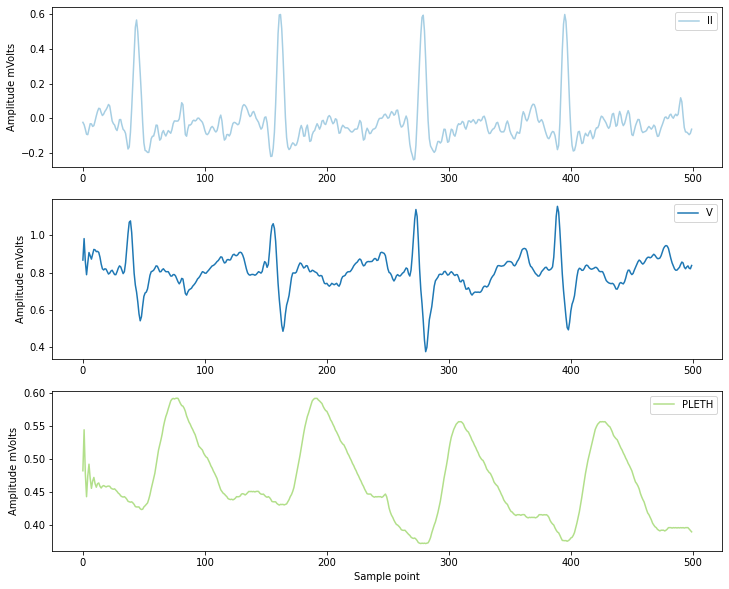

In [20]:
fig,axes = plt.subplots(3,1, figsize=(12,10))
for i, ax in enumerate(axes.flatten()):
    y = data1.iloc[0:500,(i)].values
    # Change y values from mV to V
    # y = y/1000
    # plt.ylim(0.92, 1.20)
    ax.plot(y, color=plt.cm.Paired(i/10.),label=data1.columns.values[i])
    axes[i].set_ylabel('Amplitude mVolts')
    axes[i].legend()
    plt.xlabel("Sample point")
# plt.savefig("100.pdf")
plt.show()